# Polymarket Data Analysis

This notebook provides interactive analysis of Polymarket trading data from ClickHouse.

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries loaded")

✅ Libraries loaded


In [2]:
# Import our analysis functions
from analyze_data import (
    get_client,
    get_trades_df,
    get_bbo_df,
    get_top_markets,
    get_category_stats,
    analyze_market
)

# Connect to ClickHouse
client = get_client()
print("✅ Connected to ClickHouse")

✅ Connected to ClickHouse


## 1. Overview: Top Markets

In [3]:
# Get top 20 markets by trade count
top_markets = get_top_markets(client, hours=24, limit=20)

print(f"📊 Top {len(top_markets)} Markets (Last 24h)")
print("=" * 100)
display(top_markets)

📊 Top 20 Markets (Last 24h)


,market_id,question,category,computed_category,trade_count,total_volume
0,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,"US strikes Iran by January 15, 2026?",Unknown,Unknown,48432,13884049.29
1,0xb13535b73692ecacf7157e5c5ea6a6c65c23402e85f1...,Grizzlies vs. Magic,Unknown,Sports,46476,6477001.03
2,0x6017adaa0eeec053ac8ad9ad29556728bdf306512ef2...,Counter-Strike: Liquid vs NIP (BO3),Unknown,Sports,32646,4065183.70
3,0xa8b744720006da3c08b4dc8a61a5ce930542f550fcf8...,Khamenei out as Supreme Leader of Iran by Janu...,Unknown,Politics,30516,10193317.24
4,0x1ab41efb469be9beeea65ef24fde7601697f3c10eba5...,"Bitcoin Up or Down - January 15, 2PM ET",Unknown,Unknown,29370,486442.22
5,0xabb86b080e9858dcb3f46954010e49b6f539c2003685...,"US strikes Iran by January 31, 2026?",Unknown,Politics,29352,7184140.21
6,0xd1047755d35a03b7ceea9923daae56ecf67784446daa...,"US strikes Iran by January 16, 2026?",Unknown,Politics,27462,5094498.87
7,0x9b1e6281a033f9a80490efcc3aed6d8b50d479c9e4ab...,Suns vs. Pistons,Unknown,Sports,25014,4088710.00
8,0xe93c89c41d1bb08d3bb40066d8565df301a696563b25...,No change in Fed interest rates after January ...,Unknown,Finance,23652,5859707.14
9,0x1eff235952b261d4f6dd116f489c90b4172da64bbad1...,Flames vs. Blackhawks,Unknown,Sports,22314,1070299.64


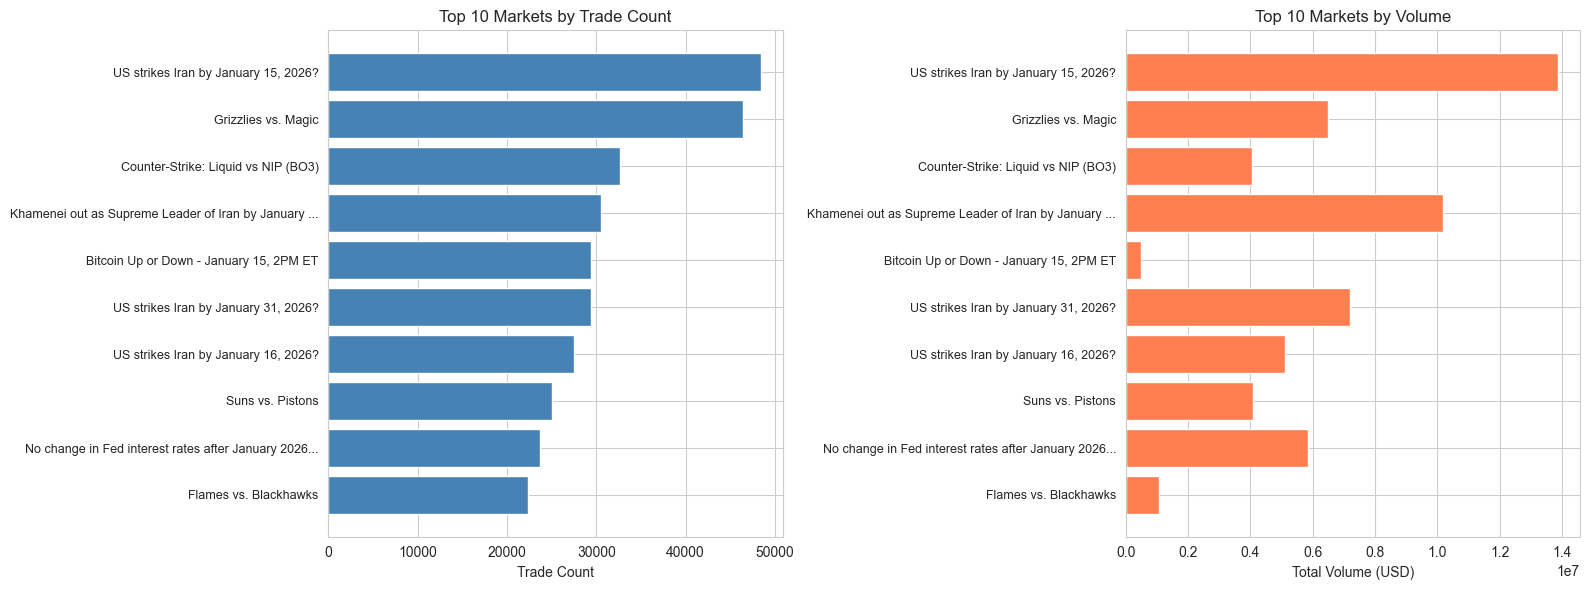

In [4]:
# Visualize top markets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Trade count
top_10 = top_markets.head(10)
ax1.barh(range(len(top_10)), top_10['trade_count'], color='steelblue')
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([q[:50] + '...' if len(q) > 50 else q for q in top_10['question']], fontsize=9)
ax1.set_xlabel('Trade Count')
ax1.set_title('Top 10 Markets by Trade Count')
ax1.invert_yaxis()

# Volume
ax2.barh(range(len(top_10)), top_10['total_volume'], color='coral')
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels([q[:50] + '...' if len(q) > 50 else q for q in top_10['question']], fontsize=9)
ax2.set_xlabel('Total Volume (USD)')
ax2.set_title('Top 10 Markets by Volume')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## 2. Category Analysis

In [5]:
# Volume by category
cat_stats = get_category_stats(client, hours=24)

print("📈 Volume by Category (Last 24h)")
print("=" * 80)
display(cat_stats)

📈 Volume by Category (Last 24h)


,computed_category,market_count,trade_count,total_volume
0,Sports,2436,819674,84711637.11
1,Politics,1248,416830,62618114.73
2,Unknown,1138,815061,52190818.88
3,Other,3012,607295,44658223.41
4,Finance,298,137948,42396457.58
5,Crypto,641,267251,27209425.79


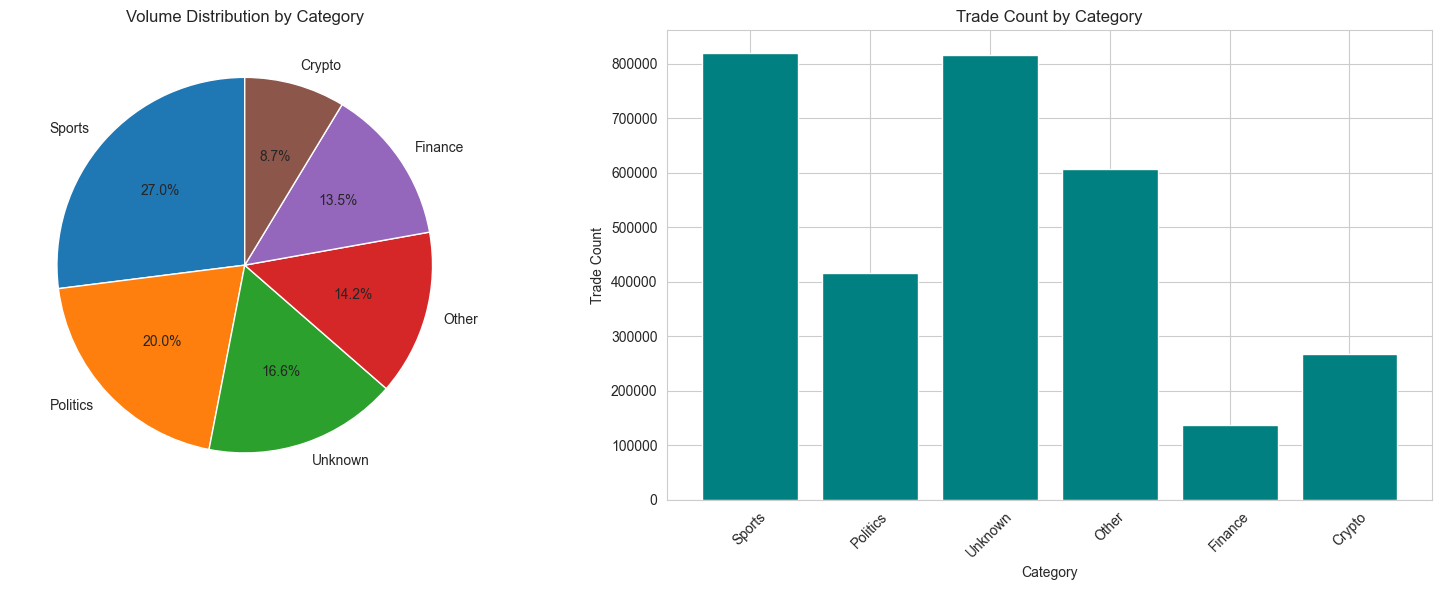

In [6]:
# Visualize category distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Volume pie chart
ax1.pie(cat_stats['total_volume'], labels=cat_stats['computed_category'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Volume Distribution by Category')

# Trade count bar chart
ax2.bar(cat_stats['computed_category'], cat_stats['trade_count'], color='teal')
ax2.set_xlabel('Category')
ax2.set_ylabel('Trade Count')
ax2.set_title('Trade Count by Category')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Deep Dive: Single Market Analysis

In [7]:
# Select a market to analyze (change this to any market_id from top_markets)
if not top_markets.empty:
    selected_market_id = top_markets.iloc[0]['market_id']
    selected_market_name = top_markets.iloc[0]['question']
    print(f"🔍 Analyzing: {selected_market_name}")
    print(f"Market ID: {selected_market_id}")
else:
    print("⚠️ No markets found. Make sure ingestion is running.")
    selected_market_id = None

🔍 Analyzing: US strikes Iran by January 15, 2026?
Market ID: 0x2d4d7f2eea43913d65c93351621a733f66ec079e111c278b34e8cc9e06ebe751


In [8]:
if selected_market_id:
    # Get all trades for this market
    trades_df = get_trades_df(client, condition_id=selected_market_id, hours=24)
    
    print(f"\n📊 Market Statistics:")
    print(f"   Total Trades: {len(trades_df):,}")
    print(f"   Total Volume: ${trades_df['notional'].sum():,.2f}")
    print(f"   Avg Price: ${trades_df['price'].mean():.4f}")
    print(f"   Price Range: ${trades_df['price'].min():.4f} - ${trades_df['price'].max():.4f}")
    print(f"   Buy Volume: ${trades_df[trades_df['side'] == 'BUY']['notional'].sum():,.2f}")
    print(f"   Sell Volume: ${trades_df[trades_df['side'] == 'SELL']['notional'].sum():,.2f}")
    
    display(trades_df.head(10))


📊 Market Statistics:
   Total Trades: 8,061
   Total Volume: $2,313,138.37
   Avg Price: $0.5523
   Price Range: $0.0100 - $0.9870
   Buy Volume: $1,846,948.95
   Sell Volume: $466,189.42


,ts,market_id,condition_id,token_id,price,size,notional,side,trade_id
0,2026-01-14 20:50:17.828,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.74,1799.200000,1331.408000,BUY,1768423817.828
1,2026-01-14 20:50:18.159,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.74,12.797296,9.469999,BUY,1768423818.159
2,2026-01-14 20:50:28.872,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.74,24.970000,18.477800,SELL,1768423828.872
3,2026-01-14 20:50:35.082,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.73,650.000000,474.500000,SELL,1768423835.082
4,2026-01-14 20:50:39.684,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6389560681113777777816403532385686601345111303...,0.26,19.230768,5.000000,BUY,1768423839.684
5,2026-01-14 20:50:42.975,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.73,350.000000,255.500000,SELL,1768423842.975
6,2026-01-14 20:50:43.411,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6389560681113777777816403532385686601345111303...,0.27,109.592591,29.590000,BUY,1768423843.411
7,2026-01-14 20:50:49.423,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6897086589880483272106772995494346262888047585...,0.75,150.000000,112.500000,BUY,1768423849.423
8,2026-01-14 20:50:57.489,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6389560681113777777816403532385686601345111303...,0.25,10.520000,2.630000,SELL,1768423857.489
9,2026-01-14 20:50:57.833,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,0x2d4d7f2eea43913d65c93351621a733f66ec079e111c...,6389560681113777777816403532385686601345111303...,0.26,100.000000,26.000000,BUY,1768423857.833


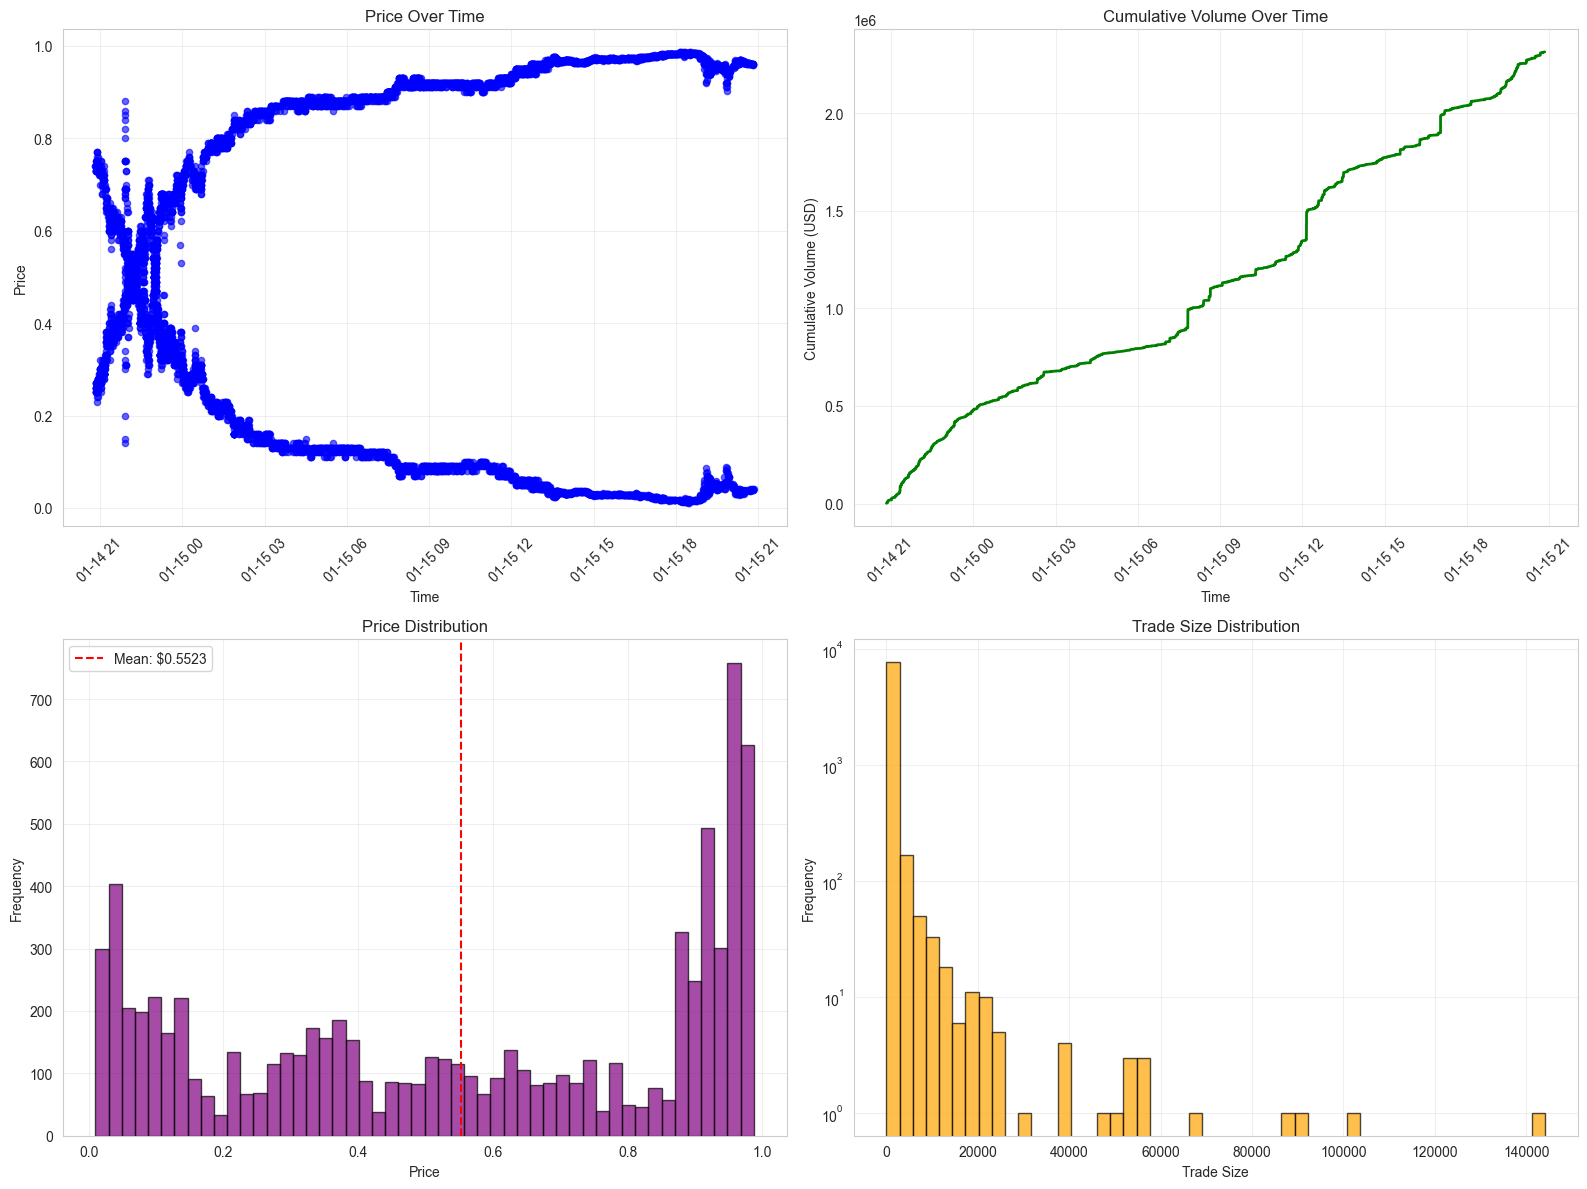

In [9]:
if selected_market_id and not trades_df.empty:
    # Price over time
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Price timeline
    axes[0, 0].scatter(trades_df['ts'], trades_df['price'], alpha=0.6, s=20, c='blue')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].set_title('Price Over Time')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Volume over time (cumulative)
    trades_df_sorted = trades_df.sort_values('ts')
    trades_df_sorted['cumulative_volume'] = trades_df_sorted['notional'].cumsum()
    axes[0, 1].plot(trades_df_sorted['ts'], trades_df_sorted['cumulative_volume'], color='green', linewidth=2)
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Cumulative Volume (USD)')
    axes[0, 1].set_title('Cumulative Volume Over Time')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Price distribution
    axes[1, 0].hist(trades_df['price'], bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Price')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Price Distribution')
    axes[1, 0].axvline(trades_df['price'].mean(), color='red', linestyle='--', label=f'Mean: ${trades_df["price"].mean():.4f}')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Trade size distribution
    axes[1, 1].hist(trades_df['size'], bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Trade Size')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Trade Size Distribution')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 4. Custom Analysis

Add your own analysis below!

In [10]:
# Close connection
client.close()
print("✅ Analysis complete!")

✅ Analysis complete!
